# Introduction:

The intent of this EDA is to investigate the impact of each recorded characteristic on the overall adoption speed. Specifically, the goal is to explore the relationships between each variable and adoption speed. 

The PetFinder Malaysia dataset investigation will hopefully yield insights that can be applied to the pet catalog of a local shelter to increase pet adoptions overall by adjusting online pet profiles. 

The datasets utilized in this notebook were cleaned and generated in the data wrangling portion of this project, details of which can be found here: [Github Link: Data_Wrangling.ipynb](https://github.com/CJEJansson/Springboard_Projects/blob/master/Capstone%201/Data_Wrangling/Data_Wrangling.ipynb)

# The Data:

In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Import Data Sets

#File Names
adoptfile  = 'tidy_data/adoption_speed.csv'
colorfile  = 'tidy_data/color_labels.csv'
wormfile   = 'tidy_data/dewormed.csv'
breedfile  = 'tidy_data/dog_breeds.csv'
datafile   = 'tidy_data/dog_data.csv'
furfile    = 'tidy_data/fur_length.csv'
healthfile = 'tidy_data/health.csv'
sizefile   = 'tidy_data/size.csv'
statefile  = 'tidy_data/state_labels.csv'
fixedfile  = 'tidy_data/sterilized.csv'
vacfile    = 'tidy_data/vaccine.csv'

#Import Files
adptspeed  = pd.read_csv(adoptfile)
color      = pd.read_csv(colorfile)
dewormed   = pd.read_csv(wormfile)
breeds     = pd.read_csv(breedfile)
dog_data   = pd.read_csv(datafile)
fur_length = pd.read_csv(furfile)
health     = pd.read_csv(healthfile)
adult_size = pd.read_csv(sizefile)
state=pd.read_csv(statefile)
fixed = pd.read_csv(fixedfile)
vaccinated = pd.read_csv(vacfile)

#### The data set variables are defined in the column variables of the data set, which can be found via the code below:

In [3]:
dog_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10230 entries, 0 to 10229
Data columns (total 25 columns):
index            10230 non-null int64
Name             7238 non-null object
Age              10230 non-null int64
Breed1           10230 non-null int64
Breed2           10230 non-null int64
BreedCount       10230 non-null int64
Gender           10230 non-null int64
Color1           10230 non-null int64
Color2           10230 non-null int64
Color3           10230 non-null int64
MaturitySize     10230 non-null int64
FurLength        10230 non-null int64
Vaccinated       10230 non-null int64
Dewormed         10230 non-null int64
Sterilized       10230 non-null int64
Health           10230 non-null int64
Quantity         10230 non-null int64
Fee              10230 non-null int64
State            10230 non-null int64
RescuerID        10230 non-null object
VideoAmt         10230 non-null int64
Description      10196 non-null object
PetID            10230 non-null object
PhotoAmt      

In [4]:
dog_data.columns

Index(['index', 'Name', 'Age', 'Breed1', 'Breed2', 'BreedCount', 'Gender',
       'Color1', 'Color2', 'Color3', 'MaturitySize', 'FurLength', 'Vaccinated',
       'Dewormed', 'Sterilized', 'Health', 'Quantity', 'Fee', 'State',
       'RescuerID', 'VideoAmt', 'Description', 'PetID', 'PhotoAmt',
       'AdoptionSpeed'],
      dtype='object')

## The characteristics of each listing are as follows:
 
 - Animal Specific
    - Name
    - Age (in months)
    - Breed 
    - Gender (M/F or "mixed" for multipet listings)
    - Color
    - Adult size
    - Fur Length
    - Health: Vacinnations, Dewormed, Sterilized, known Injuries/Illness
    
 - Listing Specific
    - Number of pets in listing
    - Presence and number of photos/videos
    - Animal location (State)
    - Organization (Rescuer ID)
    - Adoption Fee (0=Free)
    - Description
    

# Exploratory Data Analysis:

We will begin by investigating the distribution of adoption speeds in the dataset. Once this is understood, an investigation will be performed to try and determine the impacts of the following on adoption speed: 

1.  Name
    - presence vs. absence
2.  Age
2.  Breed
    - type of breed
    - mixed vs. pure breed
3.  Gender
4.  Color
    - specific color
    - multicolor vs single color
5.  Size at maturity
6.  Fur Length
7.  General health
    - has the animal been dewormed?
    - has the animal been vaccinated?
    - has the animal been spayed/neutered?
    - does the animal have any injuries/known health problems?
8.  Number of pets per listing
9.  Adoption fee
    - cost to adopt
    - paid vs free
10. Location
11. Rescue Organization
12. Media
    - number of videos
    - presence/absence of videos
    - number of photos
    - presence/absence of photos

Age was not addressed during data wrangling, and so a column to address life stages of the dogs will need to be added to the data for exploratory analysis. Typical age grouping for dogs is as follows: 

- Puppy: 0-6 months
- Adolescent: 6-18 months
- Adult: 18+ months
- Senior:
  - Small Dogs: 10-12 years (120-144 months)
  - Medium Dogs: 9-11 years (108-132 months)
  - Large Dogs: 8-10 years (96 -120 months)
  - Giant Dogs: 5-7 years (60-84 months)
  
For the purposes of this data the cut offs will be defined as follows for "senior" animals

- Small: 11 years (132 months)
- Medium: 10 years (120 months)
- Large : 9 years (108 months)
- Giant: 8 years (96 months)

Let's add a column for the life stage of the animal, "lifestage". 

In [5]:
#Initalize an empty list
lf_stg = []

for index in dog_data.index:
    #Clear dummy variable
    a=''
    
    #If age <=6 months, puppy
    if dog_data['Age'][index] <= 6:
        a='puppy'
    #If age between 6-18 mo, Adolescent/young adult
    elif dog_data['Age'][index] <=18:
        a='adolescent'
    else:
        if dog_data['MaturitySize'][index] == 1:
            if dog_data['Age'][index] < 132:
                a='adult'
            else:
                a='senior'
        elif dog_data['MaturitySize'][index] == 2:
            if dog_data['Age'][index] < 120:
                a='adult'
            else:
                a='senior'
        elif dog_data['MaturitySize'][index] == 3:
            if dog_data['Age'][index] < 108:
                a='adult'
            else:
                a='senior'
        elif dog_data['MaturitySize'][index] == 4:
            if dog_data['Age'][index] < 96:
                a='adult'
            else:
                a='senior'
    
    lf_stg.append(a)

#Find index of Age position and add 1 to define position for new column
lf_stg_posn = dog_data.columns.get_loc('Age') + 1

#Insert calculated values as new column
dog_data.insert(lf_stg_posn, "LifeStage" , lf_stg)

#Check counts
dog_data.head()

,index,Name,Age,LifeStage,Breed1,Breed2,BreedCount,Gender,Color1,Color2,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,0,Dannie & Kass [In Penang],12,adolescent,307,0,1,2,2,5,...,1,2,0,41326,e59c106e9912fa30c898976278c2e834,0,Dannie and Kass are mother and daughter. We en...,e02abc8a3,5,NaN
1,1,Precious,36,adult,76,307,2,2,7,0,...,1,1,0,41324,6f73a23fdb52bc9a30dc788fe6ccc7f6,0,"Hi, i have a dalmamation mix female dog to giv...",a3787f15e,9,NaN
2,2,Angel,24,adult,307,307,1,2,5,7,...,1,1,0,41324,6f73a23fdb52bc9a30dc788fe6ccc7f6,0,found a stray female dog who follows my mum ca...,0113cedff,3,NaN
3,3,NaN,12,adolescent,307,307,1,2,2,3,...,1,2,0,41324,6f73a23fdb52bc9a30dc788fe6ccc7f6,0,both female dogs r thrown away at d food court...,0070b950a,4,NaN
4,4,NaN,3,puppy,218,307,2,1,1,7,...,1,1,0,41324,6f73a23fdb52bc9a30dc788fe6ccc7f6,1,"Hi, im liew here.. Im not sure how is this don...",cbe2df167,0,NaN


In [6]:
#Export Data to CSV for later use, if needed
dog_data.to_csv(r'tidy_data/dog_data_WLStage.csv',index=False)

In [7]:
#Split into 3 data sets, test, train, and dog data as a whole, for ease of analysis
dogs_train = dog_data[dog_data.AdoptionSpeed.notnull()]
dogs_test = dog_data[dog_data.AdoptionSpeed.isnull()]

## Animal Location

There are 10,230 dogs in the provided dataset.Of these, the animals are distributed throughout the country of Malaysia. The data is categorized by Malaysian state. If you are unfamiliar with Malaysia, a map of the states can be seen below. 

![alt text](Imgs/States.png "Malaysian States")
(http://www.wonderfulmalaysia.com/map-maps-malaysia.htm)

A count of the animals available in each state can be seen below. It's likely that state will affect adoption speed, solely based on the number of animals available in each state. 

Text(0.5,1,'Dog Breeds By State')

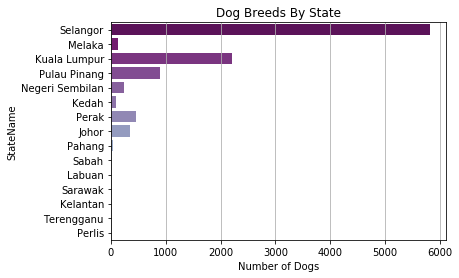

In [536]:
state_data = dog_data.merge(state,how='outer',left_on='State',right_on='StateID')
plt.figure()
c = sns.countplot(y='StateName', data=state_data, palette= 'BuPu_r')
plt.grid(b=None, which='major', axis='x')
plt.xlabel("Number of Dogs")
plt.title('Dog Breeds By State')

## Adoption Speed Distribution

There are 10,230 dogs in the provided dataset. Of those dogs, the adoption rate distribution is as follows: 

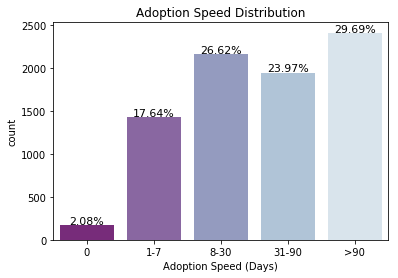

In [437]:
plt.figure()
c = sns.countplot(x='AdoptionSpeed', data=dogs_train, palette= 'BuPu_r')
plt.xticks([0,1,2,3,4], adptspeed.AdoptionSpeed)
plt.xlabel('Adoption Speed (Days)')
plt.title ('Adoption Speed Distribution')

#Add percentages above columns 
ax=c.axes
for p in ax.patches:
     ax.annotate(f"{p.get_height() * 100 / dogs_train.shape[0]:.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='k', rotation=0, xytext=(0, 4),
         textcoords='offset points')

It looks like adoption speed is fairly evenly distributed, with the exception of dogs adopted same day as listing. This makes logical sense, as it's pretty unlikely for a dog to be adopted the same day unless someone is watchign for the specific animal. 

Unfortunately the majority of pets, approximately 24%, were not adopted at all. There is some amount of chance in an animal being seen by the right person at the right time, but let's investigate further to see if there are any other factors influencing the adoption speed. 

Let's first look at the names given to a pet on their adoption profiles. 

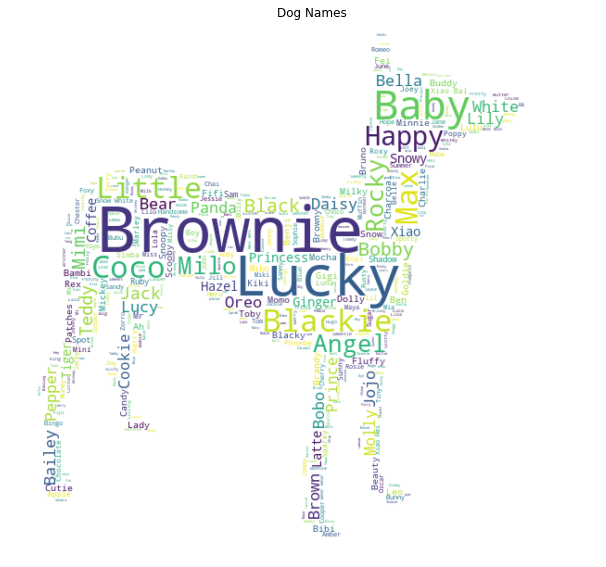

In [112]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

names = ' '.join(dog_data.Name.fillna('').values)
dogmask = np.array(Image.open("Imgs/dog_stand.png"))

cloud= WordCloud(background_color="white", max_words=1000, mask=dogmask,
                 contour_color='black').generate(names)
plt.figure(figsize=[10,10])
plt.imshow(cloud,interpolation='bilinear')
plt.title('Dog Names')
plt.axis("off")
plt.show()

WordCloud.to_file(cloud,"Imgs/names_cloud.png")

Now let's look at the distribution of named vs. unnamed animals. 

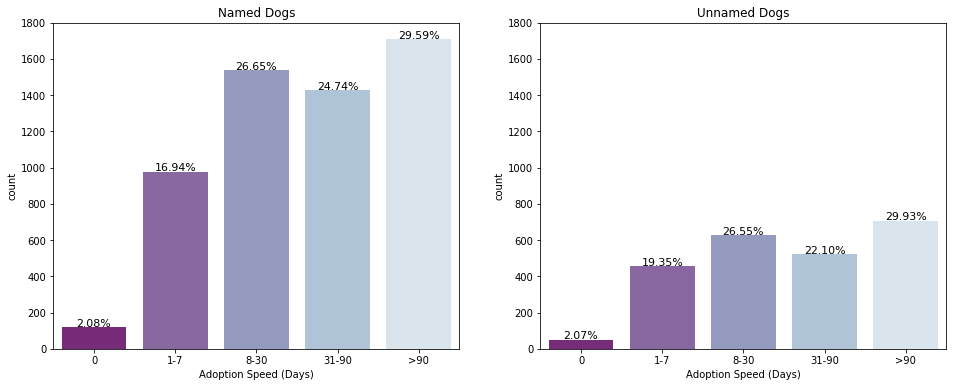

In [436]:
#Define data sets 
named = dogs_train[dogs_train.Name.notnull()]
unnamed = dogs_train[dogs_train.Name.isnull()]

fig, ax = plt.subplots(figsize = (16, 6))
plt.subplot(1, 2, 1)
c = sns.countplot(x='AdoptionSpeed', data=named, palette= 'BuPu_r')
plt.xticks([0,1,2,3,4], adptspeed.AdoptionSpeed)
plt.ylim([0,1800])
plt.xlabel('Adoption Speed (Days)')
plt.title ('Named Dogs')

ax=c.axes
for p in ax.patches:
     ax.annotate(f"{p.get_height() * 100 / named.shape[0]:.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='k', rotation=0, xytext=(0, 4),
         textcoords='offset points')

plt.subplot(1, 2, 2)
c = sns.countplot(x='AdoptionSpeed', data=unnamed, palette= 'BuPu_r')
plt.xticks([0,1,2,3,4], adptspeed.AdoptionSpeed)
plt.xlabel('Adoption Speed (Days)')
plt.ylim([0,1800])
plt.title ('Unnamed Dogs')

ax=c.axes
for p in ax.patches:
     ax.annotate(f"{p.get_height() * 100 / unnamed.shape[0]:.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='k', rotation=0, xytext=(0, 4),
         textcoords='offset points')

It appears that dogs without names are adopted faster in the first week, but only by a marginal rate. Overall, dogs with names tend to be adopted faster. Overall it is unlikely that there is much effect on adoption speed if the dog is named or not. 

| Adoption Speed | Named (%) | Unnamed (%)|
| --- | --- | --- |
| Same Day| 2.08| 2.07|
| 1-7 days| 16.94| 19.35 |
| 8-30 days| 26.65| 26.55 |
| 31-90 days| 24.74| 22.10 |
| Not Adopted| 29.59| 29.93 |

Now let's look at how breed relates to adoption speed. 
Which animals are adopted faster, mixed breeds, or purebreeds?

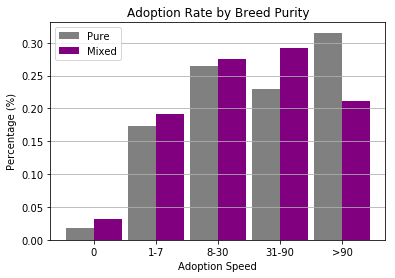

In [140]:
pure = dogs_train[dogs_train.BreedCount==1]
pdata = pd.DataFrame(pure.groupby('AdoptionSpeed').size())
p_norm=pdata/sum(pdata[0])

mixed = dogs_train[dogs_train.BreedCount==2]
mdata = pd.DataFrame(mixed.groupby('AdoptionSpeed').size())
m_norm=mdata/sum(mdata[0])

labels=adptspeed.AdoptionSpeed
x = np.arange(len(labels))
width = 0.45


fig, ax = plt.subplots()
breeds1 = plt.bar(x -width/2, p_norm[0], width, label='Pure', color='grey')
breeds2 = ax.bar(x + width/2, m_norm[0], width, label='Mixed', color ='purple')

plt.grid(b=None, which='major', axis='y')
plt.xlabel('Adoption Speed')
ax.set_ylabel('Percentage (%)')
ax.set_title('Adoption Rate by Breed Purity')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()



Mixed breed dogs appear to be adopted faster than "pure" breed dogs. But what are the most popular breeds? 

In [570]:
breed_data = dog_data.iloc[:,4:6]
breed_melt = pd.melt(breed_data, value_name='BreedID')
breed_melt = breed_melt[breed_melt.BreedID != 0]
breed_melt
breed_named = breed_melt.merge(breeds,how='outer',left_on='BreedID', right_on='BreedID')

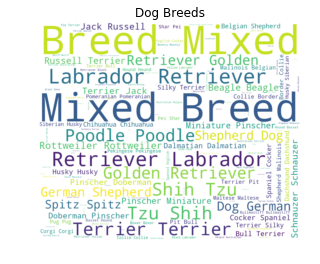

In [106]:
breed_names = ' '.join(breed_named.BreedName.fillna('').values)
cloud= WordCloud(max_font_size=None, background_color='white', width=1200, height=1000).generate(breed_names)
plt.imshow(cloud,interpolation='bilinear')
plt.title('Dog Breeds')
plt.axis("off")
plt.show()

Looks Like Breed Mixed and Mixed Breed are the most dominant values returned. People must be using those as classifiers when they're unsure of the breeds. Let's drop those values and recreate the word cloud. Then we'll need to go back and recalculate adoption speeds for mixed vs pure breed dogs. 

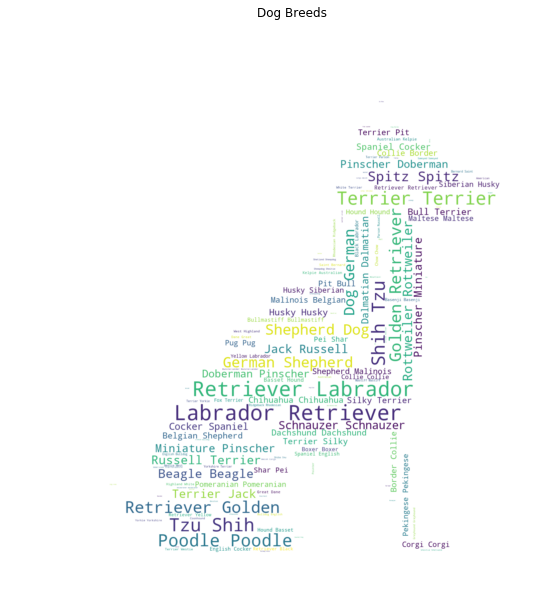

In [574]:
breed_named2 = breed_named[breed_named.BreedID != 307]
breed_names2 = ' '.join(breed_named2.BreedName.fillna('').values)

breedmask = np.array(Image.open("Imgs/dog_sit_b.png"))
cloud= WordCloud(max_font_size=None, background_color='white', mask=breedmask,
                 width=1200, height=1000).generate(breed_names2)
plt.figure(figsize=(10,10))
plt.imshow(cloud,interpolation='bilinear')
plt.title('Dog Breeds')
plt.axis("off")
plt.show()

Text(0.5,1,'Most Common Dog Breeds in Data Set')

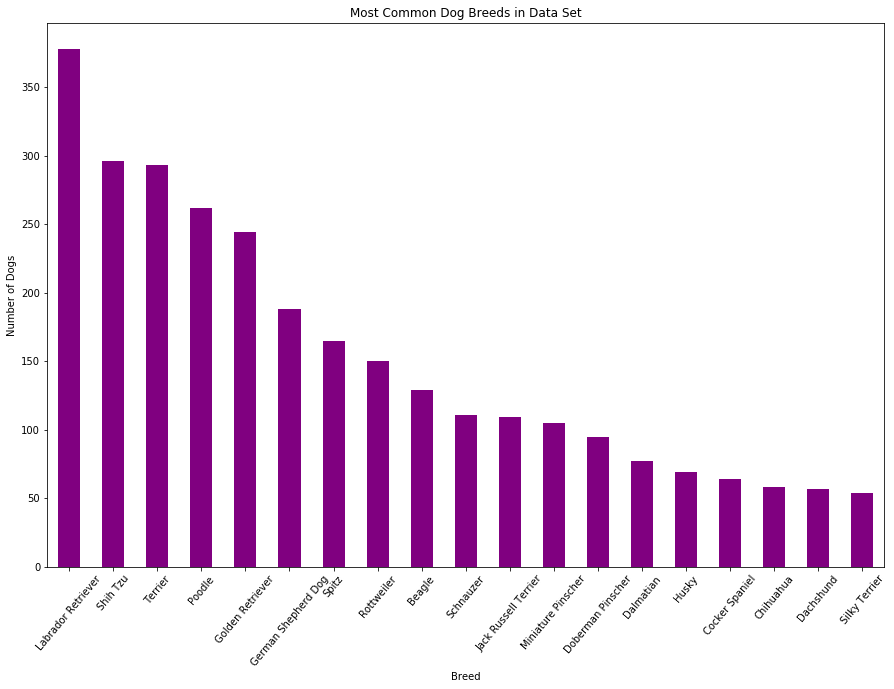

In [573]:
breed_list = breed_named2.groupby('BreedName').count()
breed_list2 = breed_list[breed_list.variable>50]

plt.figure(figsize=(15,10))
breed_list2.BreedID.sort_values(ascending=False).plot.bar(color='purple')
plt.xticks(rotation=50)
plt.xlabel("Breed")
plt.ylabel("Number of Dogs")
plt.title('Most Common Dog Breeds in Data Set')


So it appears that Labradors and Shih Tzu's are the most common dogs in the data set. The third most common is "terrier", which could be any number of dogs breeds and is pretty unspecific.

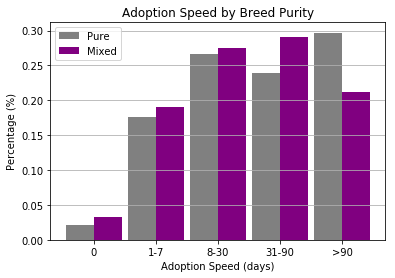

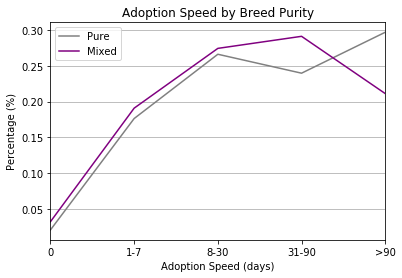

In [243]:
mixed2 = dogs_train[(dogs_train.BreedCount==2) | (dogs_train.Breed1==307) | (dogs_train.Breed2==307)]
mdata2 = pd.DataFrame(mixed.groupby('AdoptionSpeed').size())
m_norm2 = mdata2/sum(mdata2[0])

pure2 = dogs_train[(dogs_train.BreedCount==1) | (dogs_train.Breed1!=307) | (dogs_train.Breed2!=307)]
pdata2 = pd.DataFrame(pure2.groupby('AdoptionSpeed').size())
p_norm2=pdata2/sum(pdata2[0])
                   
            
labels=adptspeed.AdoptionSpeed
x2 = np.arange(len(labels))
width2 = 0.45

breeds3 = plt.bar(x2 -width2/2, p_norm2[0], width2, label='Pure', color='grey',linestyle='-')
breeds4 = plt.bar(x2 + width2/2, m_norm2[0], width2, label='Mixed', color ='purple')
plt.grid(b=None, which='major', axis='y')
plt.xlabel('Adoption Speed (days)')
plt.ylabel('Percentage (%)')
plt.title('Adoption Speed by Breed Purity')
plt.xticks(x,labels)
plt.legend()


d_breed = {'Pure': p_norm2[0],'Mixed': m_norm2[0]}
df_breed = pd.DataFrame(d_breed)
df_breed.plot.line(color = ['grey', 'purple'])
plt.grid(b=None, which='major', axis='y')
plt.xlabel('Adoption Speed (days)')
plt.ylabel('Percentage (%)')
plt.title('Adoption Speed by Breed Purity')
plt.xticks(x,labels)
plt.legend()

## Mixed rate dogs are clearly more likely to get adopted than pure breed dogs, based on this data set. 

Lets look at the expected adult size of the animal (MaturitySize) in the data set and see if they have any effect on adoption speed. 

How many dogs are there in each size group? 

In [428]:
adult_size

,Size,SizeValue
0,Small,1
1,Medium,2
2,Large,3
3,Giant,4
4,Unknown,0


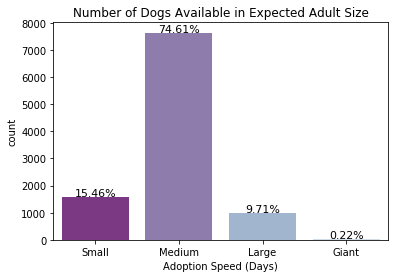

In [435]:
plt.figure()
c = sns.countplot(x='MaturitySize', data=dog_data, palette= 'BuPu_r')
plt.xticks([0,1,2,3], adult_size.Size)
plt.xlabel('Adoption Speed (Days)')
plt.title ('Number of Dogs Available in Expected Adult Size')

ax=c.axes
for p in ax.patches:
     ax.annotate(f"{p.get_height() * 100 / dog_data.MaturitySize.shape[0]:.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='k', rotation=0, xytext=(0, 4),
         textcoords='offset points')

In [386]:
from functools import reduce

#Pull Size Data
size_db = dogs_train.loc[:,['Name','MaturitySize','AdoptionSpeed']]
size_config = size_db.groupby(['MaturitySize','AdoptionSpeed']).size()
adptspd= [0,1,2,3,4]

#Create 4 subframes given grouped data
#Normalize Size Counts to Percentages
size1 = pd.DataFrame(size_config[1]/size_config[1].sum(),columns=['Small'])
size1.insert(0,'AdptSpd',adptspd)
size2 = pd.DataFrame(size_config[2]/size_config[2].sum(),columns=['Medium'])
size2['AdptSpd'] = size2.index
size3 = pd.DataFrame(size_config[3]/size_config[3].sum(),columns=['Large'])
size3['AdptSpd'] = size3.index
size4 = pd.DataFrame(size_config[4]/size_config[4].sum(),columns=['Giant'])
size4['AdptSpd'] = size4.index

#Combine 4 subframes
size_frames = [size1,size2,size3,size4]
size_merged = reduce(lambda  left,right: pd.merge(left,right,on=['AdptSpd'],
                                            how='outer'), size_frames)
size_merged

,AdptSpd,Small,Medium,Large,Giant
0,0,0.040883,0.016000,0.027632,NaN
1,1,0.231398,0.159510,0.221053,0.272727
2,2,0.253475,0.269714,0.252632,0.454545
3,3,0.200327,0.251592,0.206579,0.272727
4,4,0.273917,0.303184,0.292105,NaN


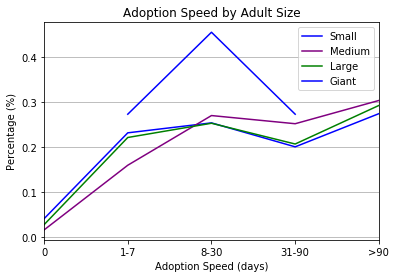

In [548]:
labels=adptspeed.AdoptionSpeed
x3 = np.arange(len(labels))

sizes = size_merged.iloc[:,1:]

sizes.plot.line(color=['blue','purple','green'])
plt.grid(b=None, which='major', axis='y')
plt.xlabel('Adoption Speed (days)')
plt.ylabel('Percentage (%)')
plt.title('Adoption Speed by Adult Size')
plt.xticks(x3,labels)
plt.legend()



It appears that all giant breed dogs are adopted, with none going unadopted. The bulk of those animals being adopted within a month. However, these values are possibly obscuring some information about the other three breeds. Let's look without the giant dogs and see if a trend becomes clear. 

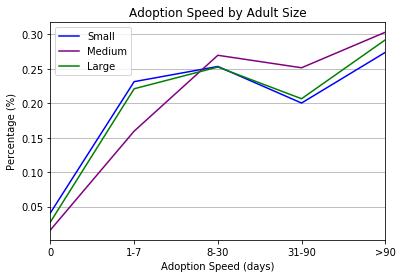

In [547]:
labels=adptspeed.AdoptionSpeed
x3 = np.arange(len(labels))

sizes_no_giant = size_merged.iloc[:,1:4]
sizes_no_giant.plot.line(color=['blue','purple','green'])
plt.grid(b=None, which='major', axis='y')
plt.xlabel('Adoption Speed (days)')
plt.ylabel('Percentage (%)')
plt.title('Adoption Speed by Adult Size')
plt.xticks(x3,labels)
plt.legend()


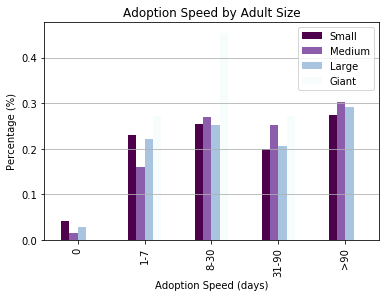

In [426]:
labels=adptspeed.AdoptionSpeed
x3 = np.arange(len(labels))

sizes = size_merged.iloc[:,1:]

sizes.plot.bar(cmap='BuPu_r')
plt.grid(b=None, which='major', axis='y')
plt.xlabel('Adoption Speed (days)')
plt.ylabel('Percentage (%)')
plt.title('Adoption Speed by Adult Size')
plt.xticks(x3,labels)
plt.legend()

So it appears that maturity size has little effect on adoption speed, unless you're a giant dog. As there are fewer giant breeds in the data set, it's possible that their scarcity makes them a higher demand animal, resulting in all giant breeds being adopted. 

Now let's look at final fur length to determine:
1. The number of animals with each fur length and;
2. Whether fur length impacts adoption speed. 

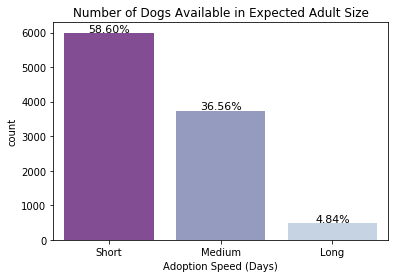

In [442]:
plt.figure()
c = sns.countplot(x='FurLength', data=dog_data, palette= 'BuPu_r')
plt.xticks([0,1,2], fur_length.Length)
plt.xlabel('Adoption Speed (Days)')
plt.title ('Number of Dogs Available in Expected Adult Size')

ax=c.axes
for p in ax.patches:
     ax.annotate(f"{p.get_height() * 100 / dog_data.FurLength.shape[0]:.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='k', rotation=0, xytext=(0, 4),
         textcoords='offset points')

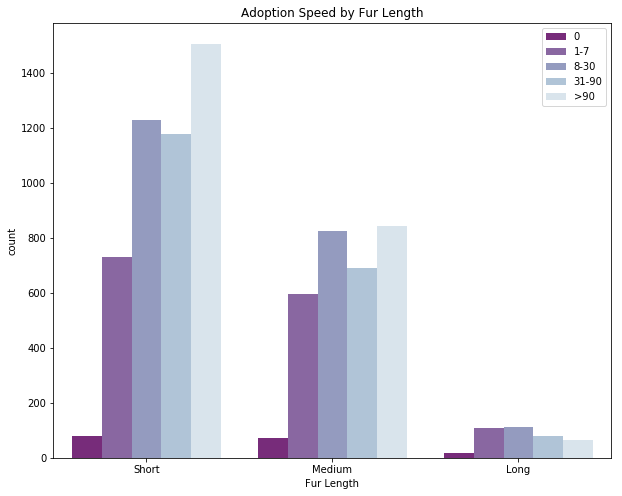

In [569]:
plt.figure(figsize=[10,8])
c = sns.countplot(x='FurLength', data=dog_data, hue='AdoptionSpeed', palette= 'BuPu_r')
plt.xticks([0,1,2], fur_length.Length)
plt.xlabel('Fur Length')
plt.title ('Adoption Speed by Fur Length')
plt.legend(adptspeed.AdoptionSpeed)


The adoption speed distribution is similarly shaped reguardless of fur. It's not clear if there's any effect. 

Let's now look at the color distribution of the animals in the data set. Based on those names, there would be no surprise if the majority of the dogs in this data set are brown or black. 

Now, does the quantity of pets per listing have any effect on adoption speed? 

Let's start by only looking at listings with one pet, as these will be the most common, then compare the resulting distributions to see if theres any noticeable difference based on the number of pets. 

In [575]:
dog_data.Quantity.unique()

array([ 2,  1,  6,  7,  3,  4,  5, 14, 13, 10, 11,  9,  8, 19, 20, 12, 17,
       16, 15])

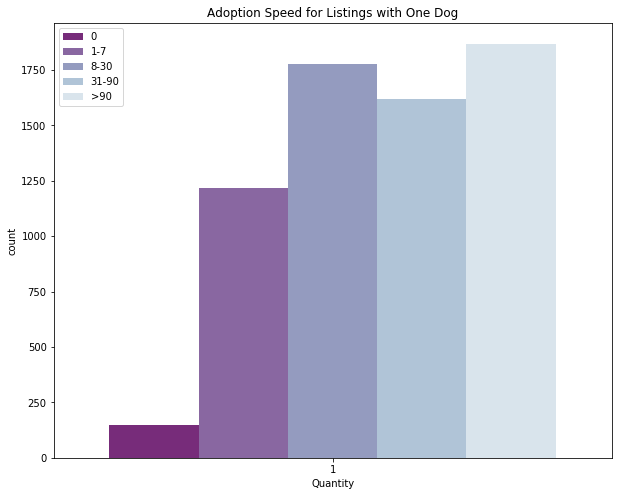

In [579]:
onedog=dog_data[dog_data.Quantity ==1]
plt.figure(figsize=[10,8])
c = sns.countplot(x='Quantity', data=onedog, hue='AdoptionSpeed', palette= 'BuPu_r')
plt.title ('Adoption Speed for Listings with One Dog')
plt.legend(adptspeed.AdoptionSpeed)


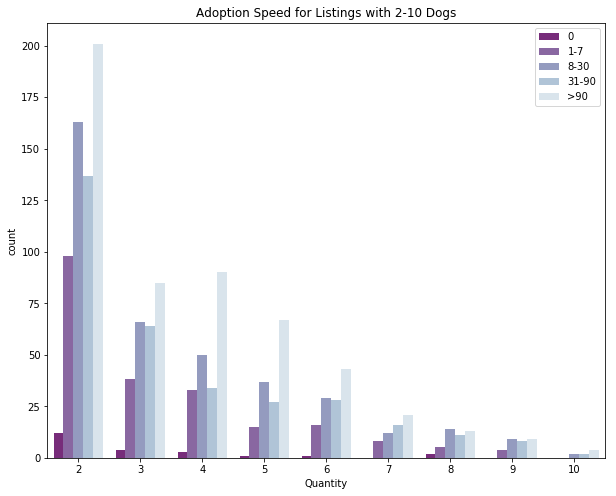

In [587]:
multidog2_10=dog_data[(dog_data.Quantity > 1) & (dog_data.Quantity <= 10)]
plt.figure(figsize=[10,8])
c = sns.countplot(x='Quantity', data=multidog2_10, hue='AdoptionSpeed', palette= 'BuPu_r')
plt.title ('Adoption Speed for Listings with 2-10 Dogs')
plt.legend(adptspeed.AdoptionSpeed, loc='upper right')


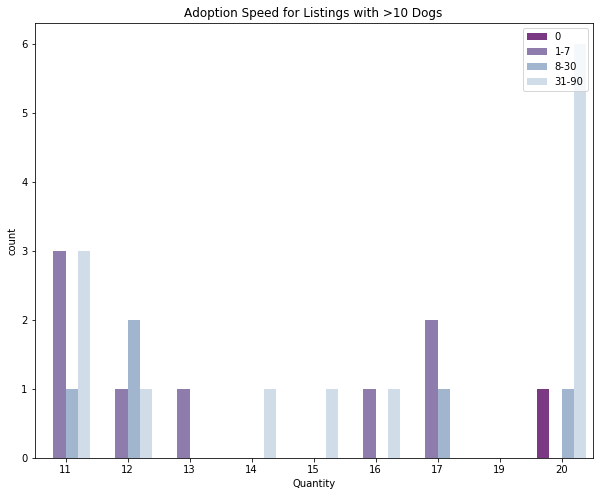

In [588]:
multidog11up=dog_data[(dog_data.Quantity > 10)]
plt.figure(figsize=[10,8])
c = sns.countplot(x='Quantity', data=multidog11up, hue='AdoptionSpeed', palette= 'BuPu_r')
plt.title ('Adoption Speed for Listings with >10 Dogs')
plt.legend(adptspeed.AdoptionSpeed, loc='upper right')

It appears that the number of dogs per listing does impact adoption speed. Listings with more dogs take longer for the dogs to be adopted, on average

Some listings include photos or vidos of the animals. Does the ability to get an impression of the dog have an effect on adoption speed? It's likely that a photo makes a big difference, but what about videos? 

In [620]:
#Create Photo presence/absence dataframe
adptspd= [0,1,2,3,4]
labels=adptspeed.AdoptionSpeed

photos_present=dog_data[(dog_data.PhotoAmt > 0)]
pp_2 = pd.DataFrame(photos_present.groupby('AdoptionSpeed').size())
pp_norm = pp_2/sum(pp_2[0])
pp_norm.insert(0,'AdptSpd',adptspd)

photos_absent = dog_data[(dog_data.PhotoAmt == 0)]
pa_2 = pd.DataFrame(photos_absent.groupby('AdoptionSpeed').size())
pa_norm = pa_2/sum(pa_2[0])
pa_norm.insert(0,'AdptSpd',adptspd)

photos = pp_norm.merge(pa_norm,how='outer',left_on='AdptSpd',right_on='AdptSpd')
photos.columns = ['AdptSpd','Present','Absent']
photo_use = photos.iloc[:,1:]

,Present,Absent
0,0.019403,0.077720
1,0.178027,0.108808
2,0.269875,0.113990
3,0.242913,0.108808
4,0.289782,0.590674


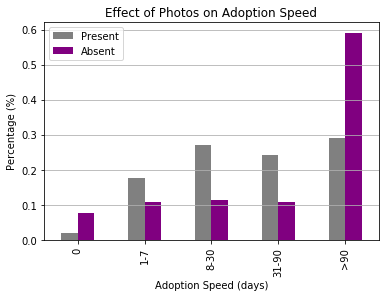

In [643]:
labels=adptspeed.AdoptionSpeed
x = np.arange(len(labels))

photo_use.plot.bar(color = ['grey', 'purple'])
plt.grid(b=None, which='major', axis='y')
plt.xticks(x,labels)
plt.xlabel('Adoption Speed (days)')
plt.ylabel('Percentage (%)')
plt.title('Effect of Photos on Adoption Speed')
plt.legend()

In [622]:
#Create video presence/absence dataframe
adptspd= [0,1,2,3,4]

videos_present = dog_data[(dog_data.VideoAmt > 0)]
vp_2 = pd.DataFrame(videos_present.groupby('AdoptionSpeed').size())
vp_norm = vp_2/sum(vp_2[0])
vp_norm.insert(0,'AdptSpd',adptspd)

videos_absent = dog_data[(dog_data.VideoAmt == 0)]
va_2 = pd.DataFrame(videos_absent.groupby('AdoptionSpeed').size())
va_norm = va_2/sum(va_2[0])
va_norm.insert(0,'AdptSpd',adptspd)

videos = vp_norm.merge(va_norm,how='outer',left_on='AdptSpd',right_on='AdptSpd')
videos.columns = ['AdptSpd','Present','Absent']
video_use = videos.iloc[:,1:]
video_use

,Present,Absent
0,0.038835,0.020074
1,0.119741,0.178622
2,0.265372,0.266206
3,0.300971,0.237310
4,0.275081,0.297788


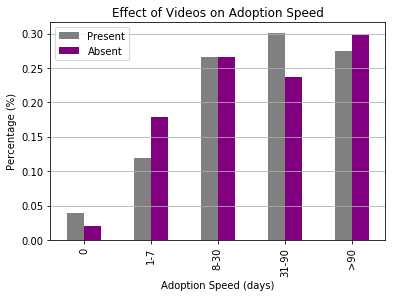

In [642]:
labels=adptspeed.AdoptionSpeed
x = np.arange(len(labels))

video_use.plot.bar(color = ['grey', 'purple'])
plt.grid(b=None, which='major', axis='y')
plt.xticks(x,labels)
plt.xlabel('Adoption Speed (days)')
plt.ylabel('Percentage (%)')
plt.title('Effect of Videos on Adoption Speed')
plt.legend()

The presence of photos in the listing definitely makes a difference, improving adoption times, as expected. 

The presence of videos doesn't seem to have much effect.

The majority of animals have no adoption fee. Let's go ahead and remove these animals from the dataset 

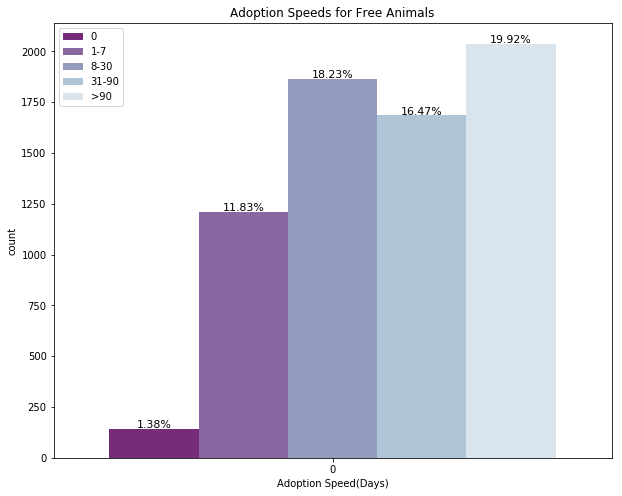

In [646]:
labels=adptspeed.AdoptionSpeed
x = np.arange(len(labels))

free=dog_data[dog_data.Fee ==0]
plt.figure(figsize=[10,8])
c = sns.countplot(x='Fee', data=free, hue='AdoptionSpeed', palette= 'BuPu_r')
plt.xlabel('Adoption Speed(Days)')
plt.title ('Adoption Speeds for Free Animals')
plt.legend(adptspeed.AdoptionSpeed)

ax=c.axes
for p in ax.patches:
     ax.annotate(f"{p.get_height() * 100 / dog_data.Fee.shape[0]:.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='k', rotation=0, xytext=(0, 4),
         textcoords='offset points')

Text(0.5,1,'Range of Adoption Fees')

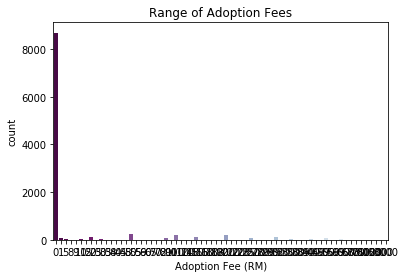

In [630]:
plt.figure()
c = sns.countplot(x='Fee', data=dog_data, palette= 'BuPu_r')
#plt.xticks([0,1,2], fur_length.Length)
plt.xlabel('Adoption Fee (RM)')
plt.title ('Range of Adoption Fees')

#ax=c.axes
#for p in ax.patches:
#     ax.annotate(f"{p.get_height() * 100 / dog_data.Fee.shape[0]:.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
#         ha='center', va='center', fontsize=11, color='k', rotation=0, xytext=(0, 4),
#         textcoords='offset points')